# Model for Life Expectancy

**Team:**<br>
Emma | Hong-Kiu | Raphael

**The objective of the model is:**

- Build model that will predict the life expectancy based on features provided in the dataset
- Explore which factors are responsible for higher life expectancy
- Give recommendations to improve life expectancy in specific countries

**Data:**<br>
Collected by World Health Organization (WHO) and United Nations (UN). The final dataset consists of 22 columns (20 predicting variables) and 2938 row containing data collected from the year 2000-2015 of 193 countries. All predicting variables were divided into the following broad categories:

- Immunization related factors
- Mortality factors
- Economical factors
- Social factors

    Link to the Dataset:<br>
    [Life-Expectancy | Kaggle.com](https://www.kaggle.com/kumarajarshi/life-expectancy-who)<br>
    [GDP | worldbank.org](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

**Table of contents:**<a name="index"></a>
1. [Import Libraries](#libraries)
2. [Load datasets and clean column-names ](#files)
3. [Have a look and clean Data](#clean)
4. [Add/drop columns and rows](#drop)


### 1. Import libraries <a name="libraries"></a>

Import necessary libraries for data-handling, plotting, modeling.

[↑ back to top ↑](#index)

In [1279]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

### 2. Load and clean column-names <a name="files"></a>
Loading datasets into panda dataframes and clean column-names (lower case, no space)

[↑ back to top ↑](#index)

Create functions for loading and cleaning column names

In [1280]:
# load csv files with line 0 as default header
def load_original_data(a,line_header=0): 
    df = pd.read_csv(a,header=line_header)
    return df

# function to make column lower case
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

#
def no_column_space(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

Apply function on the our initial dataset - **Life Expectancy**.

In [1281]:
df = load_original_data('data/Life Expectancy Data.csv') 

df = lower_case_column_names(df)

df = no_column_space(df)

##df = drop_columns(df)##
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})


,% NaN,% 0.0
country,0.00,0.00
year,0.00,0.00
status,0.00,0.00
life_expectancy_,0.34,0.00
adult_mortality,0.34,0.00
infant_deaths,0.00,28.86
alcohol,6.60,0.00
percentage_expenditure,0.00,20.80
hepatitis_b,18.82,0.00
measles_,0.00,33.46


Sort columns of life expectancy dataframe

In [1282]:
df.columns = (['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population',
       '_thinness_1_19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'])

### 3. Have a look and clean data <a name="clean"></a>
Have a look at the data provided in the individual columns. 
Clean if possible.
Otherwise drop or get alternative data.

[↑ back to top ↑](#index)

In [1283]:
# Have a look at the data provided in the individual columns. 
df_describe = pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)}).transpose()
df_describe.append(df.describe()).transpose()

,% NaN,% 0.0,count,mean,std,min,25%,50%,75%,max
country,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.00,0.00,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
status,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
life_expectancy,0.34,0.00,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
adult_mortality,0.34,0.00,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,0.00,28.86,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,6.60,0.00,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage_expenditure,0.00,20.80,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis_b,18.82,0.00,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
measles,0.00,33.46,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05


In [1284]:
df.shape

(2938, 22)

<AxesSubplot:>

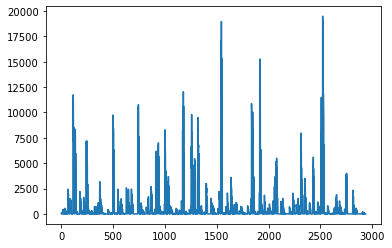

In [1285]:
df.percentage_expenditure.plot()

#### Add additional Dataset with GDP-Values for different countries
It turned out that the column gdp of the dataset life expectancy was messy and difficult to clean (random messyness -> has to be manually cleaned).<br>
So we decided to import gdp data via another dataset distributed by worldbank.org.<br>
Apply import- and column-clean-functions on additonal gdp-dataset.

In [1286]:
# Import second database for cleaning gdp
df_gdp = load_original_data('Data/GDP.csv',2)
df_gdp = lower_case_column_names(df_gdp)
df_gdp = no_column_space(df_gdp)
df_gdp.index =df_gdp['country_name'] # set country as index
df_gdp = df_gdp.drop(columns=['country_name','country_code','indicator_name','indicator_code']) # drop some unesessary columns

In [1287]:
# build function to clean gdp column with new values of 2nd dataframe
# function ignores values of new datafram if value is NaN
def replace_gdp(df_insert_values,df_get_values):
    list_to_replace = []
    country_not_matched = []
    # Dictionary with some countries manually matched (compared first 4 characters)
    dic_substitutes = {'Bahamas':'Bahamas, The',
                        'Bolivia (Plurinational State of)':'Bolivia',
                        'Congo':'Congo, Rep.',
                        'Czechia':'Czech Republic',
                        'Democratic Republic of the Congo':'Congo, Dem. Rep.',
                        'Egypt':'Egypt, Arab Rep.',
                        'Gambia':'Gambia, The',
                        'Iran (Islamic Republic of)':'Iran, Islamic Rep.',
                        'Kyrgyzstan':'Kyrgyz Republic',
                        "Lao People's Democratic Republic":'Lao PDR',
                        'Micronesia (Federated States of)':  'Micronesia, Fed. Sts.',
                        'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                        'United States of America':'United States',
                        'Venezuela (Bolivarian Republic of)':'Venezuela, RB',
                        'Viet Nam':'Vietnam',
                        'Yemen':'Yemen, Rep.'}
    for row in df_insert_values.index: #loops through rows of df to be updated
        country = df_insert_values.country[row] #saves country of that row - gdp df has country_name as index
        year = str(df_insert_values.year[row]) #saves year of that row as string - gdp df has years (String) as columns
        if country in df_get_values.index and not pd.isnull(df_get_values.loc[country,year]): # check if country can be matched
            df.loc[row,'gdp'] = df_get_values.loc[country,year] #replace gdp-value
        else: #if country is not matchable
            if country not in list_to_replace: #replace manually
                list_to_replace.append(country) #add country to looping list
                if country in dic_substitutes.keys() and not pd.isnull(df_get_values.loc[dic_substitutes[country],year]): #get corresponding country_name
                    df.loc[row,'gdp'] = df_get_values.loc[dic_substitutes[country],year]
                else:
                    country_not_matched.append(country) #add to list of unmatchable countries
    return country_not_matched

In [1288]:
## Apply function on df
replace_gdp(df,df_gdp) #has not matchable countries or countries with NaN values as output 

['Afghanistan',
 "Côte d'Ivoire",
 'Cook Islands',
 "Democratic People's Republic of Korea",
 'Eritrea',
 'Niue',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Slovakia',
 'Somalia',
 'South Sudan',
 'Swaziland',
 'Syrian Arab Republic',
 'The former Yugoslav republic of Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)']

### 4. Add/drop columns and rows<a name="drop"></a>
Drop columns that are to messy to clean or are not adding to the quality of the model.<br>
Drop rows with NaN/Zeroes

[↑ back to top ↑](#index)

In [1289]:
#save initial file without removing rows and columns
df_original = df.copy()
df_original.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', '_thinness_1_19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [1290]:
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)}).head(22)

,% NaN,% 0.0
country,0.00,0.00
year,0.00,0.00
status,0.00,0.00
life_expectancy,0.34,0.00
adult_mortality,0.34,0.00
infant_deaths,0.00,28.86
alcohol,6.60,0.00
percentage_expenditure,0.00,20.80
hepatitis_b,18.82,0.00
measles,0.00,33.46


In [1291]:
columns_to_drop = ['adult_mortality', 'percentage_expenditure', 'under_five_deaths', 'infant_deaths','bmi','year']

In [1292]:
df.drop(columns_to_drop, axis=1, inplace = True)


In [1293]:
## Drop 0 value

df = df.replace(0, np.NaN)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [1294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1062 non-null   object 
 1   status                           1062 non-null   object 
 2   life_expectancy                  1062 non-null   float64
 3   alcohol                          1062 non-null   float64
 4   hepatitis_b                      1062 non-null   float64
 5   measles                          1062 non-null   float64
 6   polio                            1062 non-null   float64
 7   total_expenditure                1062 non-null   float64
 8   diphtheria                       1062 non-null   float64
 9   hiv_aids                         1062 non-null   float64
 10  gdp                              1062 non-null   float64
 11  population                       1062 non-null   float64
 12  _thinness_1_19_years

In [1295]:
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
country,0.0,0.0
status,0.0,0.0
life_expectancy,0.0,0.0
alcohol,0.0,0.0
hepatitis_b,0.0,0.0
measles,0.0,0.0
polio,0.0,0.0
total_expenditure,0.0,0.0
diphtheria,0.0,0.0
hiv_aids,0.0,0.0


In [1296]:
## Missed countries
def clean_missedcountry(a):
    missed_country = a[a.groupby('country')['country'].transform('size') < 10]
    missed_list = missed_country.index.tolist()
    a.drop(missed_list, inplace = True)
    return a

In [1297]:
clean_missedcountry(df)

,country,status,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,65.0,0.01,65.0,1154.0,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,0.01,62.0,492.0,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,0.01,64.0,430.0,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,0.01,67.0,2787.0,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,0.01,68.0,3013.0,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,4.36,68.0,31.0,67.0,7.13,65.0,33.6,482.998451,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,44.5,4.06,7.0,998.0,7.0,6.52,68.0,36.7,478.007604,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,Developing,44.8,4.43,73.0,304.0,73.0,6.53,71.0,39.8,530.530446,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,Developing,45.3,1.72,76.0,529.0,76.0,6.16,75.0,42.1,568.386291,12366165.0,1.6,1.7,0.427,9.8


In [1298]:
def remove_outliers(df):
    df_n = df._get_numeric_data()
    df_c = df.select_dtypes(include=['object'])
    Q1 = df_n.quantile(0.25)
    Q3 = df_n.quantile(0.75)
    IQR = Q3 - Q1
    df_n = df_n[~((df_n < (Q1 - 1.5 * IQR)) |(df_n > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df_n.merge(df_c,how='left',left_index=True,right_index=True)
    return df
remove_outliers(df)

,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling,country,status
19,76.9,5.14,99.0,9.0,99.0,5.59,99.0,0.1,4247.629984,2941.0,1.3,1.4,0.752,14.2,Albania,Developing
20,76.6,5.37,99.0,28.0,99.0,5.71,99.0,0.1,4437.142885,295195.0,1.4,1.5,0.738,13.3,Albania,Developing
21,76.2,5.28,99.0,10.0,99.0,5.34,99.0,0.1,4094.350334,291321.0,1.4,1.5,0.725,12.5,Albania,Developing
24,75.9,5.58,98.0,22.0,99.0,6.10,98.0,0.1,3595.037163,29717.0,1.6,1.7,0.703,11.6,Albania,Developing
25,74.2,5.31,98.0,68.0,97.0,5.86,97.0,0.1,2972.743265,2992547.0,1.7,1.8,0.696,11.4,Albania,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,67.6,1.96,98.0,823.0,94.0,5.49,96.0,0.4,654.283837,2648825.0,3.2,3.2,0.626,11.8,Uzbekistan,Developing
2836,67.3,1.78,99.0,737.0,99.0,5.11,99.0,0.3,546.776850,26167.0,3.2,3.2,0.620,11.7,Uzbekistan,Developing
2837,67.8,1.59,99.0,75.0,99.0,5.11,99.0,0.3,465.119887,2586435.0,3.2,3.2,0.613,11.6,Uzbekistan,Developing
2838,67.2,1.54,99.0,85.0,99.0,5.17,98.0,0.3,396.377979,2556765.0,3.3,3.3,0.607,11.3,Uzbekistan,Developing


In [1299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          728 non-null    object 
 1   status                           728 non-null    object 
 2   life_expectancy                  728 non-null    float64
 3   alcohol                          728 non-null    float64
 4   hepatitis_b                      728 non-null    float64
 5   measles                          728 non-null    float64
 6   polio                            728 non-null    float64
 7   total_expenditure                728 non-null    float64
 8   diphtheria                       728 non-null    float64
 9   hiv_aids                         728 non-null    float64
 10  gdp                              728 non-null    float64
 11  population                       728 non-null    float64
 12  _thinness_1_19_years 

In [1300]:
##drop duplicated rows
df.drop_duplicates()

,country,status,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,65.0,0.01,65.0,1154.0,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,0.01,62.0,492.0,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,0.01,64.0,430.0,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,0.01,67.0,2787.0,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,0.01,68.0,3013.0,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,4.36,68.0,31.0,67.0,7.13,65.0,33.6,482.998451,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,Developing,44.5,4.06,7.0,998.0,7.0,6.52,68.0,36.7,478.007604,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,Developing,44.8,4.43,73.0,304.0,73.0,6.53,71.0,39.8,530.530446,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,Developing,45.3,1.72,76.0,529.0,76.0,6.16,75.0,42.1,568.386291,12366165.0,1.6,1.7,0.427,9.8


In [1301]:


column_1 = df["life_expectancy"]
column_2 = df["income_composition_of_resources"]
correlation = column_1.corr(column_2)

# Plotting for first impression

In [1302]:
corr_matrix = df.corr()

In [1303]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [1304]:
df.columns

Index(['country', 'status', 'life_expectancy', 'alcohol', 'hepatitis_b',
       'measles', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids',
       'gdp', 'population', '_thinness_1_19_years'],
      dtype='object')

In [1305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               728 non-null    object 
 1   status                728 non-null    object 
 2   life_expectancy       728 non-null    float64
 3   alcohol               728 non-null    float64
 4   hepatitis_b           728 non-null    float64
 5   measles               728 non-null    float64
 6   polio                 728 non-null    float64
 7   total_expenditure     728 non-null    float64
 8   diphtheria            728 non-null    float64
 9   hiv_aids              728 non-null    float64
 10  gdp                   728 non-null    float64
 11  population            728 non-null    float64
 12  _thinness_1_19_years  728 non-null    float64
dtypes: float64(11), object(2)
memory usage: 95.8+ KB


In [1306]:
#df.style.background_gradient(cmap='Blues')


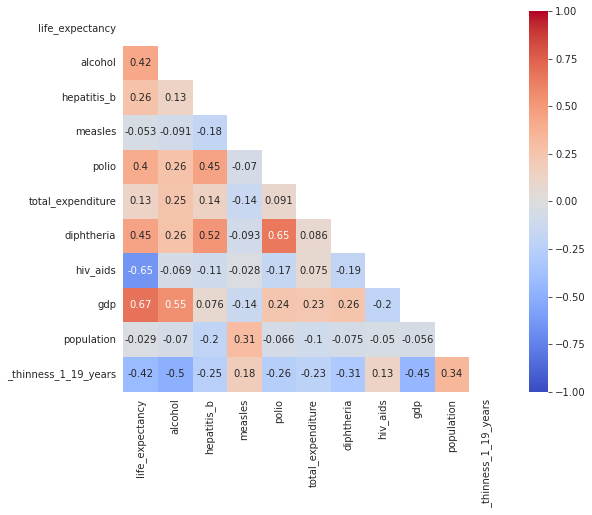

In [1307]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Clean the NaN 


In [1308]:
df.columns[df.isna().any()].tolist()

[]

## Clean the life_expectancy


In [1309]:
##df.fillna(df.mean(), inplace=True)
##Testing for replacing all rows with NaN.

In [1310]:
df_alcohol_clean = df[df['alcohol'].isnull()]
alcohol_list = df_alcohol_clean.index.tolist()
for a in alcohol_list:
    b = df.iloc[a]




## Should not drop life_expectancy because it is a independant variable. 
## And the number of NaN values at this columns is not significant.

## Clean adult_mortality. 
The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to 
the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). 
In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to 
die before reaching age 60, and 850 are expected to survive to age 60. This is based on a “synthetic cohort”: 
current life-table mortality rates are applied to the current cohort of 15 year olds, assuming no changes in mortality.

In [1311]:
##df[df['adult_mortality'].isnull()]
## Same case as life expectancy.

## Clean alcohol

In [1312]:
df[df['alcohol'].isnull()]

,country,status,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years


In [1313]:
## add dropped columnd to df for tabluea-dataset
df_tableau = df.merge(df_original[columns_to_drop],how='inner',left_index=True,right_index=True)

In [1314]:
#df_tableau.to_csv("data/tableau_cleaned.csv")

In [1315]:
df['life_expectancy'].idxmin(axis=0, skipna=True)


1583

In [1316]:
df.loc[1583]

country                     Malawi
status                  Developing
life_expectancy               44.0
alcohol                        1.1
hepatitis_b                   64.0
measles                       92.0
polio                         79.0
total_expenditure             4.82
diphtheria                    64.0
hiv_aids                      24.7
gdp                      298.43341
population               1213711.0
_thinness_1_19_years           7.7
Name: 1583, dtype: object

# Get the numeric and categoric

In [1317]:
numericals_features =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years
0,65.0,0.01,65.0,1154.0,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2
1,59.9,0.01,62.0,492.0,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5
2,59.9,0.01,64.0,430.0,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7
3,59.5,0.01,67.0,2787.0,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9
4,59.2,0.01,68.0,3013.0,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2


In [1318]:
numericals_features_scaled = StandardScaler().fit_transform(numericals_features)
numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [1319]:
## Get Categorical data

categoricals_features = df.select_dtypes(object)

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [1320]:
numericals_features_scaled

,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years
0,-0.403335,-1.139632,-0.568001,-0.232320,-3.449729,0.991866,-0.995998,-0.379486,-0.627715,0.070762,2.097625
1,-0.928681,-1.139632,-0.687695,-0.278205,-1.145852,1.000174,-1.144480,-0.379486,-0.625117,-0.252255,2.152266
2,-0.928681,-1.139632,-0.607899,-0.282503,-0.968631,0.979403,-1.045492,-0.379486,-0.623406,0.051378,2.188693
3,-0.969885,-1.139632,-0.488205,-0.119132,-0.747105,1.141416,-0.897010,-0.379486,-0.623060,-0.219678,2.225120
4,-1.000788,-1.139632,-0.448306,-0.103467,-0.702799,0.871395,-0.847516,-0.379486,-0.626783,-0.226623,2.279761
...,...,...,...,...,...,...,...,...,...,...,...
2933,-2.535624,-0.157579,-0.448306,-0.310159,-0.747105,0.563986,-0.995998,4.840129,-0.634723,-0.131882,0.676958
2934,-2.515022,-0.225307,-2.882095,-0.243133,-3.405424,0.310581,-0.847516,5.323138,-0.635089,-0.133270,0.749813
2935,-2.484119,-0.141776,-0.248816,-0.291236,-0.481273,0.314736,-0.699034,5.806147,-0.631234,-0.254208,-0.816563
2936,-2.432615,-0.753584,-0.129121,-0.275641,-0.348357,0.161031,-0.501059,6.164508,-0.628455,-0.135859,-0.743708


In [1321]:
categoricals_features

,country_Albania,country_Armenia,country_Australia,country_Austria,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Botswana,country_Brazil,country_Bulgaria,country_Cameroon,country_Canada,country_China,country_France,country_Georgia,country_Germany,country_Ghana,country_Greece,country_India,country_Indonesia,country_Iraq,country_Israel,country_Italy,country_Jordan,country_Kazakhstan,country_Kenya,country_Lithuania,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Morocco,country_Mozambique,country_Myanmar,country_Nepal,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Portugal,country_Romania,country_Russian Federation,country_Rwanda,country_Senegal,country_Serbia,country_South Africa,country_Spain,country_Sri Lanka,country_Thailand,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_Uzbekistan,country_Zambia,country_Zimbabwe,status_Developing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [1322]:
all_features=pd.concat([numericals_features_scaled, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features = all_features.reset_index()
all_features

,index,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,country_Albania,country_Armenia,country_Australia,country_Austria,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Botswana,country_Brazil,country_Bulgaria,country_Cameroon,country_Canada,country_China,country_France,country_Georgia,country_Germany,country_Ghana,country_Greece,country_India,country_Indonesia,country_Iraq,country_Israel,country_Italy,country_Jordan,country_Kazakhstan,country_Kenya,country_Lithuania,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Morocco,country_Mozambique,country_Myanmar,country_Nepal,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Portugal,country_Romania,country_Russian Federation,country_Rwanda,country_Senegal,country_Serbia,country_South Africa,country_Spain,country_Sri Lanka,country_Thailand,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_Uzbekistan,country_Zambia,country_Zimbabwe,status_Developing
0,0,-0.403335,-1.139632,-0.568001,-0.232320,-3.449729,0.991866,-0.995998,-0.379486,-0.627715,0.070762,2.097625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,-0.928681,-1.139632,-0.687695,-0.278205,-1.145852,1.000174,-1.144480,-0.379486,-0.625117,-0.252255,2.152266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,-0.928681,-1.139632,-0.607899,-0.282503,-0.968631,0.979403,-1.045492,-0.379486,-0.623406,0.051378,2.188693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,-0.969885,-1.139632,-0.488205,-0.119132,-0.747105,1.141416,-0.897010,-0.379486,-0.623060,-0.219678,2.225120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,-1.000788,-1.139632,-0.448306,-0.103467,-0.702799,0.871395,-0.847516,-0.379486,-0.626783,-0.226623,2.279761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2933,-2.535624,-0.157579,-0.448306,-0.310159,-0.747105,0.563986,-0.995998,4.840129,-0.634723,-0.131882,0.676958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
724,2934,-2.515022,-0.225307,-2.882095,-0.243133,-3.405424,0.310581,-0.847516,5.323138,-0.635089,-0.133270,0.749813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
725,2935,-2.484119,-0.141776,-0.248816,-0.291236,-0.481273,0.314736,-0.699034,5.806147,-0.631234,-0.254208,-0.816563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
726,2936,-2.432615,-0.753584,-0.129121,-0.275641,-0.348357,0.161031,-0.501059,6.164508,-0.628455,-0.135859,-0.743708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [1323]:
x=numericals_features_scaled.drop(['life_expectancy'], axis=1)
y=numericals_features_scaled.life_expectancy

In [1324]:
x

,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years
0,-1.139632,-0.568001,-0.232320,-3.449729,0.991866,-0.995998,-0.379486,-0.627715,0.070762,2.097625
1,-1.139632,-0.687695,-0.278205,-1.145852,1.000174,-1.144480,-0.379486,-0.625117,-0.252255,2.152266
2,-1.139632,-0.607899,-0.282503,-0.968631,0.979403,-1.045492,-0.379486,-0.623406,0.051378,2.188693
3,-1.139632,-0.488205,-0.119132,-0.747105,1.141416,-0.897010,-0.379486,-0.623060,-0.219678,2.225120
4,-1.139632,-0.448306,-0.103467,-0.702799,0.871395,-0.847516,-0.379486,-0.626783,-0.226623,2.279761
...,...,...,...,...,...,...,...,...,...,...
2933,-0.157579,-0.448306,-0.310159,-0.747105,0.563986,-0.995998,4.840129,-0.634723,-0.131882,0.676958
2934,-0.225307,-2.882095,-0.243133,-3.405424,0.310581,-0.847516,5.323138,-0.635089,-0.133270,0.749813
2935,-0.141776,-0.248816,-0.291236,-0.481273,0.314736,-0.699034,5.806147,-0.631234,-0.254208,-0.816563
2936,-0.753584,-0.129121,-0.275641,-0.348357,0.161031,-0.501059,6.164508,-0.628455,-0.135859,-0.743708


In [1325]:
y

0      -0.403335
1      -0.928681
2      -0.928681
3      -0.969885
4      -1.000788
          ...   
2933   -2.535624
2934   -2.515022
2935   -2.484119
2936   -2.432615
2937   -2.360508
Name: life_expectancy, Length: 728, dtype: float64

In [1326]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [1327]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

LinearRegression()

In [1328]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

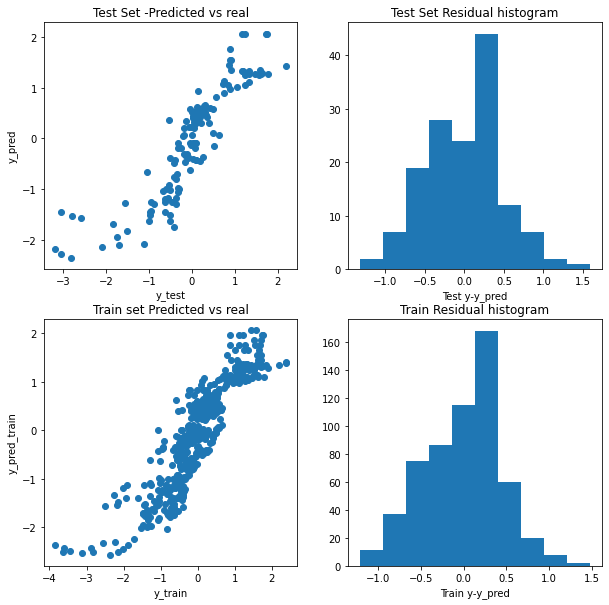

In [1329]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [1330]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.2091703170057956 -- test MSE: 0.24147064053484238


In [1331]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.45735141522225076 -- test RMSE: 0.49139662242921694


In [1332]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.2091703170057956 -- test MAE: 0.24147064053484238


In [1333]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.7804250224475595
0.7804250224475595


In [1334]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7659209872330863


In [1335]:
model = sm.OLS(y_train, X_train).fit()
predictions_train = model.predict(X_train) 
predictions_test = model.predict(X_test) 
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              209.4
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                   7.34e-184
Time:                        17:49:47   Log-Likelihood:                         -370.52
No. Observations:                 582   AIC:                                      761.0
Df Residuals:                     572   BIC:                                      804.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [1341]:
model.coef

AttributeError: 'OLSResults' object has no attribute 'coef'

In [1336]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          1.59e-183
Time:                        17:49:48   Log-Likelihood:                -370.52
No. Observations:                 582   AIC:                             763.0
Df Residuals:                     571   BIC:                             811.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.274e-05 

In [1337]:
df['life_expectancy'].idxmin(axis=0, skipna=True)


1583

In [1338]:
df.loc[1583]

country                     Malawi
status                  Developing
life_expectancy               44.0
alcohol                        1.1
hepatitis_b                   64.0
measles                       92.0
polio                         79.0
total_expenditure             4.82
diphtheria                    64.0
hiv_aids                      24.7
gdp                      298.43341
population               1213711.0
_thinness_1_19_years           7.7
Name: 1583, dtype: object

In [1339]:
df

,country,status,life_expectancy,alcohol,hepatitis_b,measles,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years
0,Afghanistan,Developing,65.0,0.01,65.0,1154.0,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2
1,Afghanistan,Developing,59.9,0.01,62.0,492.0,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5
2,Afghanistan,Developing,59.9,0.01,64.0,430.0,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7
3,Afghanistan,Developing,59.5,0.01,67.0,2787.0,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9
4,Afghanistan,Developing,59.2,0.01,68.0,3013.0,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,4.36,68.0,31.0,67.0,7.13,65.0,33.6,482.998451,12777511.0,9.4
2934,Zimbabwe,Developing,44.5,4.06,7.0,998.0,7.0,6.52,68.0,36.7,478.007604,12633897.0,9.8
2935,Zimbabwe,Developing,44.8,4.43,73.0,304.0,73.0,6.53,71.0,39.8,530.530446,125525.0,1.2
2936,Zimbabwe,Developing,45.3,1.72,76.0,529.0,76.0,6.16,75.0,42.1,568.386291,12366165.0,1.6
